Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Sales and Profit per Year:
                  Sales      Profit
Order Year                         
2014        484247.4981  49543.9741
2015        470532.5090  61618.6037
2016        609205.5980  81795.1743
2017        733215.2552  93439.2696
Top 10 Most Profitable Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.883

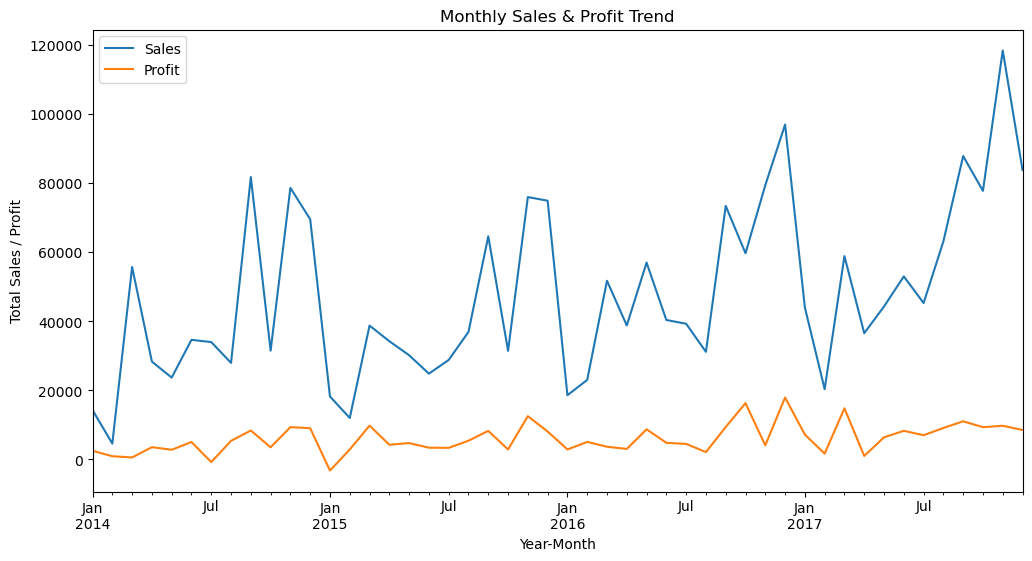

Cleaned data saved as 'cleaned_superstore_data.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\amalm\OneDrive\Desktop\CHURN DATA\archive (8)\Sample - Superstore.csv", encoding='latin1')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract Year and Month
df['Order Year'] = df['Order Date'].dt.year
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Create 'Shipment Duration' column
df['Shipment Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Sales and profit trends per year
sales_profit_per_year = df.groupby('Order Year')[['Sales', 'Profit']].sum()
print("Sales and Profit per Year:")
print(sales_profit_per_year)

# Top 10 most profitable products
top_profitable_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Profitable Products:")
print(top_profitable_products)

# Monthly Sales and Profit Trends
monthly_sales = df.groupby('Year-Month')[['Sales', 'Profit']].sum()
monthly_sales.plot(kind='line', figsize=(12, 6), title='Monthly Sales & Profit Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales / Profit')
plt.show()

# Save cleaned data
df.to_csv("cleaned_superstore_data.csv", index=False)
print("Cleaned data saved as 'cleaned_superstore_data.csv'")
